# Определение возраста покупателей

## Исследовательский анализ данных

In [1]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.applications.resnet import ResNet50
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


Загрузили данные. В выборке 7591 фотография. Это не супер много для нейронных сетей, надо быть аккуратнее с переобучением.

In [3]:
%%time
ages = []
print(len(train_gen_flow))
for i in range(len(train_gen_flow)):
    ages = np.hstack([ages, train_gen_flow[i][1]])

238
CPU times: user 44.2 s, sys: 1.76 s, total: 45.9 s
Wall time: 1min 26s


Собрали данные о возрасте в один массив для отображения на графике.

Text(0, 0.5, 'Количество фотографий')

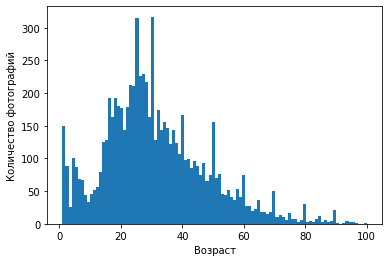

In [4]:
plt.hist(ages, bins = 100)
plt.xlabel("Возраст")
plt.ylabel("Количество фотографий")

График имеет нормальное распределение с небольшим пиком в младенчестве с последующим спадом. Это объяснимо, так как родители часто фотографируют младенцев, а во взрослом возрасте люди фотографируют себя сами. Причём люди старшего поколения обычно делают меньше фотографий.

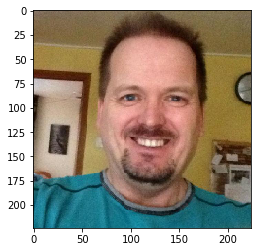

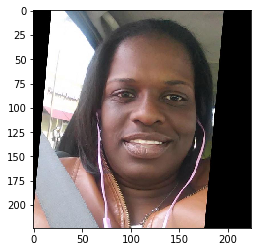

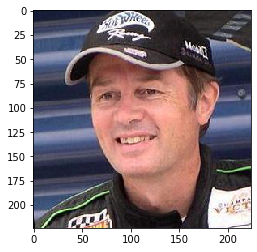

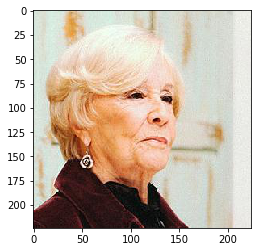

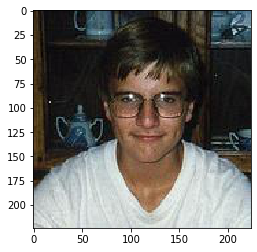

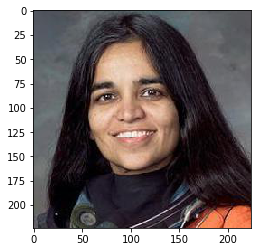

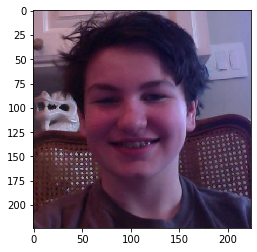

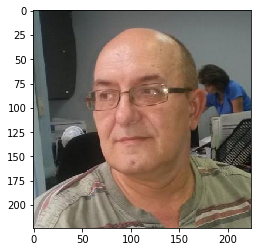

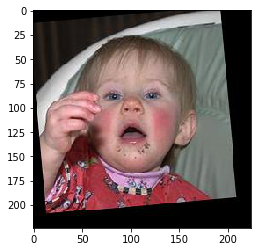

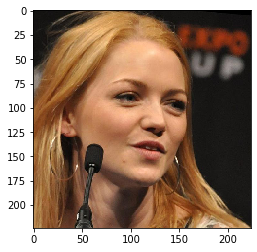

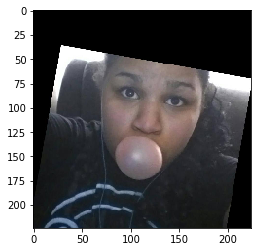

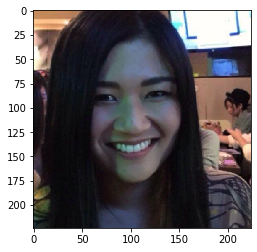

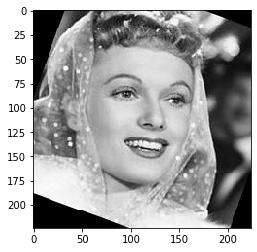

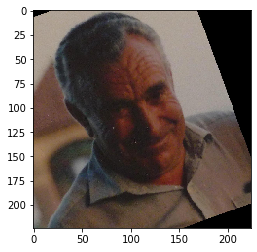

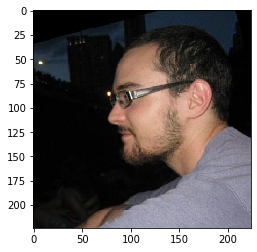

In [5]:
for i in range(15):
    plt.imshow(train_gen_flow[0][0][i])
    plt.show()

Датасет устроен хорошо с точки зрения разнообразия, есть люди обоих полов, разных возрастов и рас. Также есть фотографии с лицом, частично закрытым руками и разными углами поворота головы. Из увиденных картинок можно предположить, что алгоритм будет хорошо работать с разными людьми, не ломаясь на фотографиях какого-либо типа.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

### Код для обучения модели и загрузки данных

### Вывод модели

## Анализ обученной модели

Модель довольно быстро обучилась(меньше 10 минут) и выдаёт довольно неплохие прогнозы со средней погрешностью в 6.19 лет. Так как MAE меньше 8, то задачу можно считать решённой, а модель в дальнейшем применять. Также архитектура ResNet50 доказала свою эффективность применительно к нашей задаче. Также можно говорить о переобучении модели после 9-ой эпохи(стали ухудшаться результаты на тесте)